 # <center>Learning a linear function</center>
 ## We want to fit a perceptron to the function y = 45*x + 23
 First we need to generate a dataset

 Let x be a vector of 1000 random numbers:

```
import numpy as np

size = 1000
x = np.random(1, size)

```

let y the labels of each x entry:
```
y = 45*x + 23
```
obs: the code in the cell adds a noise to the labels based on a gaussian distribution with 5 as mean and 5 as variance (it can modified in order to better visualization)
Now we have and 1000 sized labeled dataset. We need to split it into train, validation and test. The portion for each set will be taken like the literarture use to (70%, 15%, 15%).

```
training = x[:700]
validation = x[700:850]
test = x[850:]
```

Now we can fit the perceptron
```
fit(dataset, weights)
```

In [0]:
import numpy as np
import random
import time
import sklearn
import matplotlib.pyplot as plt

# Defining the perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    # Defina o perceptron aqui
    inputs_bias = np.append(inputs,1)
    output = np.dot(inputs_bias.T, weights)
    return output

In [0]:
def init(size):
  weights = (np.random.rand(1,size) - 0.5)[0]
  bias = (np.random.rand(1) - 0.5) 
  weights = np.append(weights, bias) 
  return weights


In [0]:
# Inicialização
import matplotlib.pyplot as plt
from IPython.display import clear_output


def fit(dataset, weights, epochs, neta = 0.00001):
  loss_plot = []
  for i, epoch in enumerate(range(epochs)):
    acc = 0
    loss_sum = 0
    mean_input = np.empty(0)
    for input_value, output_gt in dataset:
      out = perceptron(input_value, weights)
      
      loss = ((output_gt - out)**2)/len(dataset) #MSE loss
      
      loss_sum += loss
      
      mean_input = np.append(mean_input, input_value)
      
      wb = np.append(input_value,1) #weight + bias
      
      weights += neta*wb*loss_sum # Dwi = -neta*wb*loss_sum
    #weights += neta*np.append(np.mean(mean_input), 1)*loss_sum # Dwi = -neta*wb*loss_sum

    if (i % 500) == 0:
    
      x_ = x[700:850]
      y_ = weights[1]*x_ + weights[0]
      
      clear_output(wait = True)
      plt.plot(np.sort(x_), np.sort(y_))
      
      y_ = y[700:850]
      
      plt.plot(np.sort(x_), np.sort(y_), 'bo')
      plt.show()

      
  
    loss_plot.append(loss_sum)
  x_ = [x for x, _ in dataset]
  y_ = np.empty(0)
  for inp in x_:
    y_ = np.append(y_,np.dot(weights, np.append(1,inp)))

  plt.plot(loss_plot )
  #plt.plot(x_, y_)

    # print(loss_sum)   
    

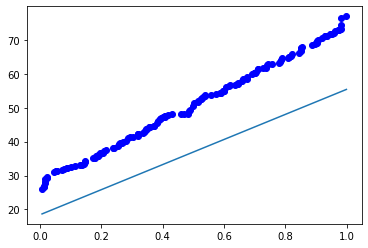

[19.12597338 38.34871249]
----------58.390156984329224----------


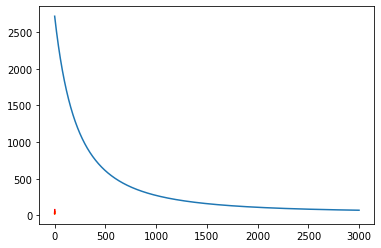

In [13]:

size = 1000
x = np.random.rand(size)


y = 45*x + 23 + np.random.rand(size)*10


training = x[:700]
validation = x[700:850]
test = x[850:]

weights = init(x.ndim)
dataset =[]
for  i,x_ in enumerate(training):
  dataset.append((x_, y[i]))

t1 = time.time()
fit(dataset, weights, 3000, 1e-7)
t2 = time.time()

print(weights)

print(10*'-' + str(t2 - t1) + 10*'-')
plt.plot(np.sort(x),np.sort(y), 'r')


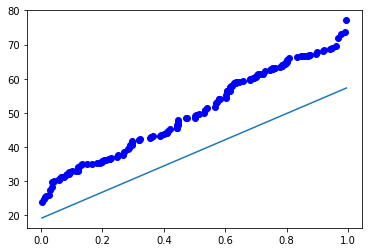

0.1623032703481957


In [14]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

y_true = y[850:]
y_pred = weights[1]*test + weights[0]


plt.plot(np.sort(test),np.sort(y_true), 'bo')
plt.plot(np.sort(test),np.sort(y_pred))
plt.show()
print(r2_score(y_true, y_pred))
#evaluate(weights,linear_dataset_test)
  
  

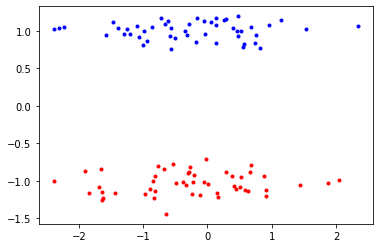

In [15]:
from sklearn import datasets

separable = False
while not separable:
    samples = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

              precision    recall  f1-score   support

           0       0.56      0.98      0.71        50
           1       0.92      0.22      0.35        50

    accuracy                           0.60       100
   macro avg       0.74      0.60      0.53       100
weighted avg       0.74      0.60      0.53       100

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        50
           1       1.00      0.86      0.92        50

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

              preci

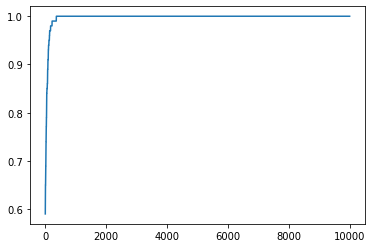

In [46]:
from random import shuffle
weights = init(2)
inputs = samples[0][:]
labels = samples[1][:]
dataset = [(inp, labels[i]) for i,inp in enumerate(inputs)]

shuffle(dataset)
fit(dataset,weights, 10000, neta = 1e-3)

[-0.09225097  0.3852655  -0.19255304]


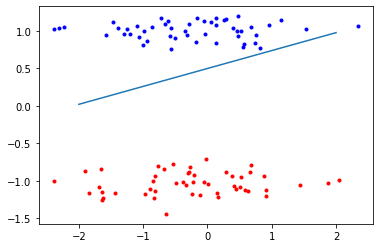

In [47]:
print(weights)
x = np.linspace(-2,2, num = 100)
y = -(x*weights[0] + weights[2])/weights[1]
plt.plot(x, y)
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

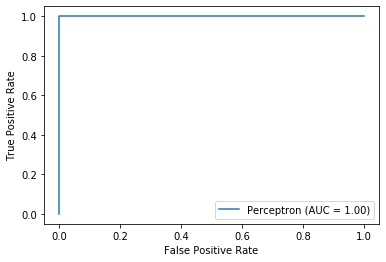

In [22]:

from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_roc_curve
neuron = Perceptron()
neuron.fit(samples[0], samples[1])
disp = plot_roc_curve(neuron, samples[0], samples[1])
plt.show()

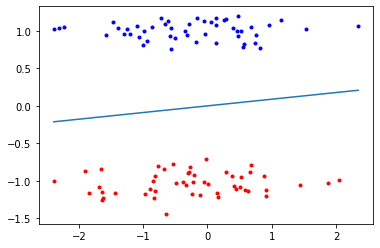

In [34]:
x = np.linspace(min((red[:,0].min(),blue[:,0].min())),max(red[:,0].max(),blue[:,0].max()), num = 100)
y = -(x*neuron.coef_[0][0] + 0)/neuron.coef_[0][1]
plt.plot(x, y)
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

# Going Further in Deep Learning

In [0]:
%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [0]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

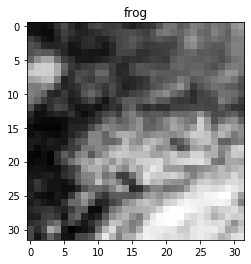

In [0]:
#@title Selecting an image

# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1627 #@param {type:"slider", min:0, max:10000, step:1}
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [0]:
size = len(linear_dataset_train[0][0])
print(size)

1024


#Redefing the perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    # Defina o perceptron aqui
    inputs_bias = np.append(inputs,1)
    output = np.dot(inputs_bias.T, weights)
    return sigmoid(output)

# Treinando o perceptron

In [0]:
def fit(dataset, weights, epochs, neta = 0.00001):
  loss_plot = []
  acc = []
  for i, epoch in enumerate(range(epochs)):
    
    loss_sum = 0
    acc_sum = 0
    mean_input = np.empty(0)
    for input_value, output_gt in dataset:
      out = perceptron(input_value, weights)
      
      loss = ((output_gt - out)**2)/len(dataset) #MSE loss
      
      loss_sum += loss
      
      mean_input = np.append(mean_input, input_value)
      
      if (out < 0.5 and output_gt > 0.5) or (out > 0.5 and output_gt < 0.5):
        wb = np.append(input_value,1) #weight + bias
        
        weights += neta*wb*loss_sum # Dwi = -neta*wb*loss_sum
      else:
        acc_sum += 1
        
    #weights += neta*np.append(np.mean(mean_input), 1)*loss_sum # Dwi = -neta*wb*loss_sum
    acc.append(acc_sum/len(dataset))
  
    loss_plot.append(loss_sum)
    if (epoch % 100) == 0:
     # plt.plot(loss_plot)
     # plt.show()
      evaluate(weights, dataset)
  plt.plot(acc)
    

In [0]:
from sklearn import metrics as mtr

def evaluate(weights,dataset):
    i = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    y_hat = []
    for img,label in dataset:
        # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
        y = perceptron(img, weights)
        
        if y > 0.5:
          y_hat.append(1) 
         
        else:
          y_hat.append(0)
          
        
    print(mtr.classification_report([y_true for _, y_true in dataset], y_hat ))
        
    
    

              precision    recall  f1-score   support

           0       0.68      0.01      0.03      2977
           1       0.41      0.99      0.58      2023

    accuracy                           0.41      5000
   macro avg       0.54      0.50      0.30      5000
weighted avg       0.57      0.41      0.25      5000



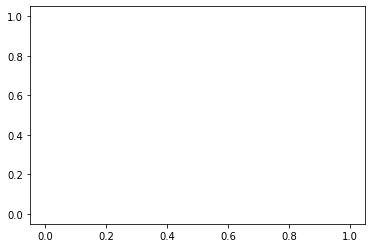

In [0]:
from random import shuffle 

shuffle(linear_dataset_train)
weights = init(32*32)
t1 = time.time()
lr = 1e-7 #@param
epochs = 100 #@param
size = 5000 #@param
fit(linear_dataset_train[:size], weights, 10)
t2 = time.time()

In [0]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt
evaluate(weights, linear_dataset_train)
#plt.plot(accuracies)

              precision    recall  f1-score   support

           0       0.68      0.01      0.02     30000
           1       0.40      0.99      0.57     20000

    accuracy                           0.40     50000
   macro avg       0.54      0.50      0.29     50000
weighted avg       0.57      0.40      0.24     50000



In [0]:
clf_cifar = Perceptron()
X = [X.squeeze(1) for X,_ in linear_dataset_train]
print(X[0])
y = [y for _, y in linear_dataset_train]
print(y[0])
clf_cifar.fit(X,y )

[0.23921569 0.17254902 0.18823529 ... 0.7372549  0.48235294 0.38431373]
0


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

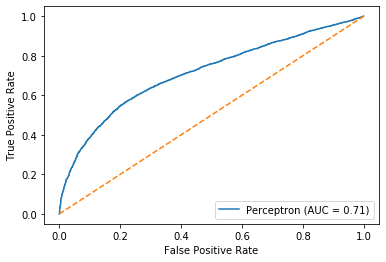

In [0]:
X = [X.squeeze(1) for X,_ in linear_dataset_test]
y = [y for _, y in linear_dataset_test]
plot_roc_curve(clf_cifar, X, y)
plt.plot([0, 1], [0, 1], '--')

# Classifying individual classes 

code here the needed assess and training process modifications in order to classify each class individualy.

- General idea: train a perceptron by class(positive samples = class samples; negative samples = the other classes samples)
Put an softmax layer at the top of the 10 neurons, train them realitve to softmax outcome, select the highest probability 

In [0]:
!pip install skorch

     |████████████████████████████████| 112kB 5.2MB/s 


# A merge torch an sklearn library called Skorch

If you look to improve your knowledge in the development of AI models, this library merges the best of the two worlds

In [0]:
import skorch


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
